# OpenCV Edge Detection
In general contours are the boundary pixels of an object/image that has same color and intensity. They are useful in shape analysis and object detection/recognition using traditional computer vision algorithms. You can do a lot of analysis based on contours to arrive at a solution to many computer vision problems.

In this Notebook, you will learn the approach and many different aspects of contour analysis.

## <font style="color:rgb(50,120,229)">Objective </font>
 - Learn how to find contour.
 - Learn drawing contour.
 - Learn various properties, such as **centre of mass, area of parameter, fitting bounding box and ellipse**

## 1. Import Libraries

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/vmzfc3wy5wwfrvi/AACY8uK6k6aTF5QJahLkAplta?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

module-code.zip     100%[===================>]  18.47M  32.9MB/s    in 0.6s    
mapname:  conversion of  failed


In [ ]:
print(cv2.__version__)

4.11.0


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

## 2. Load an image and display

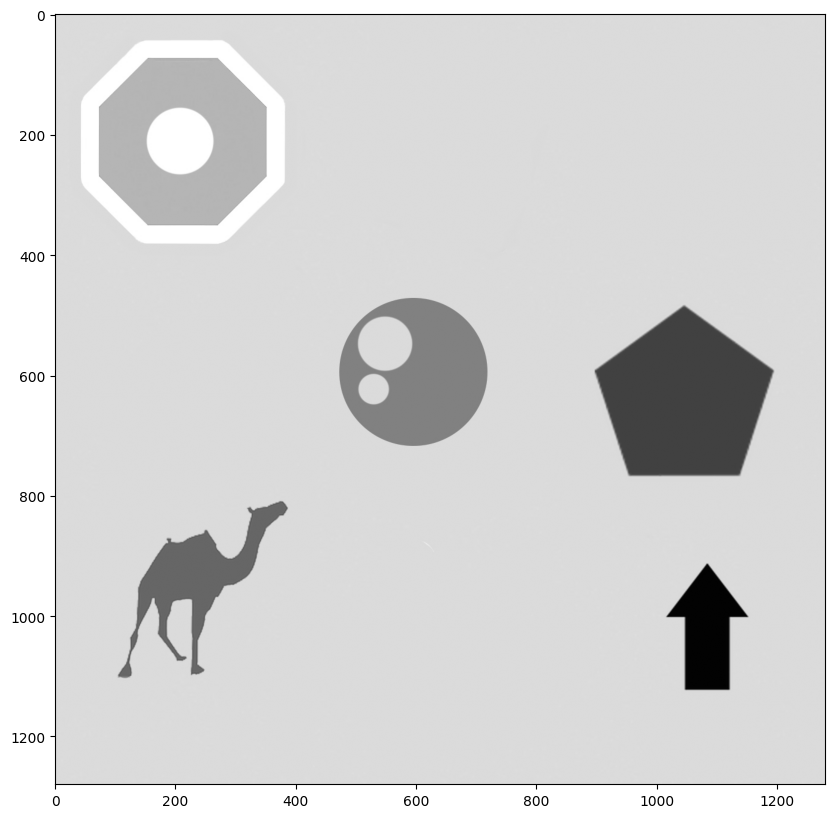

In [ ]:
imagePath = 'shapes.jpg'
image = cv2.imread(imagePath)
# Convert to grayscale
imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Display image
plt.imshow(imageGray);

## 3. Threshold

Thresholding is required to convert the image to black and white, highlighting the objects-of-interest to make things easy for the contour detection algorithm. Thresholding turns the border of the object in the image completely white, with all pixels having the same intensity. The algorithm can now detect the borders of the objects from these white pixels.

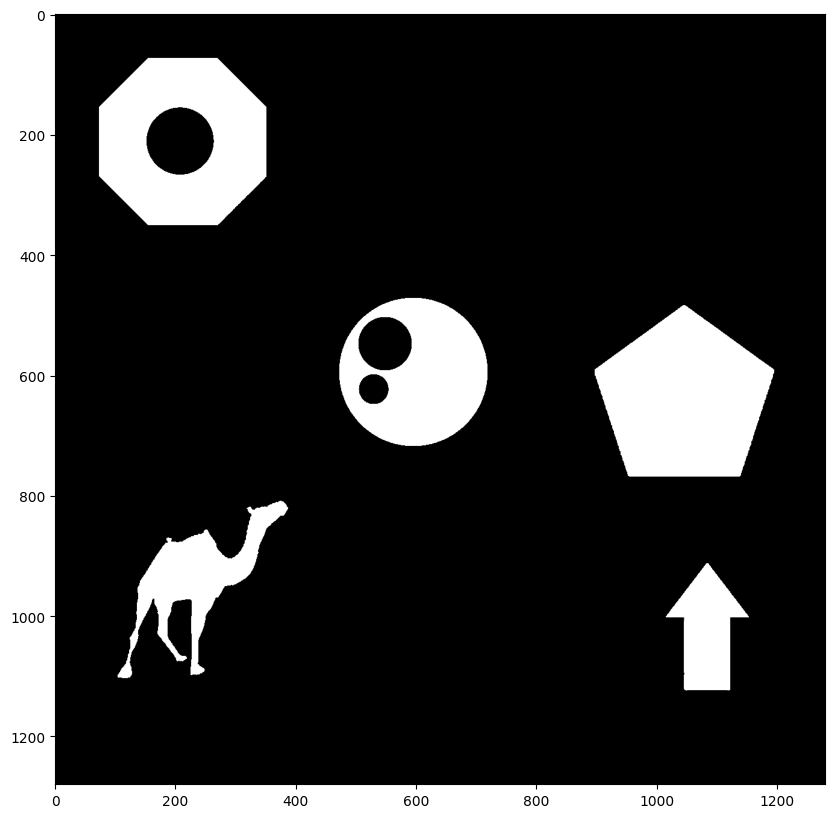

In [ ]:
ret, thresh = cv2.threshold(imageGray, 200, 255, cv2.THRESH_BINARY_INV)
#ret, thresh = cv2.threshold(imageGray, 254, 255, cv2.THRESH_BINARY_INV)
#et, thresh = cv2.threshold(imageGray, 150, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh);

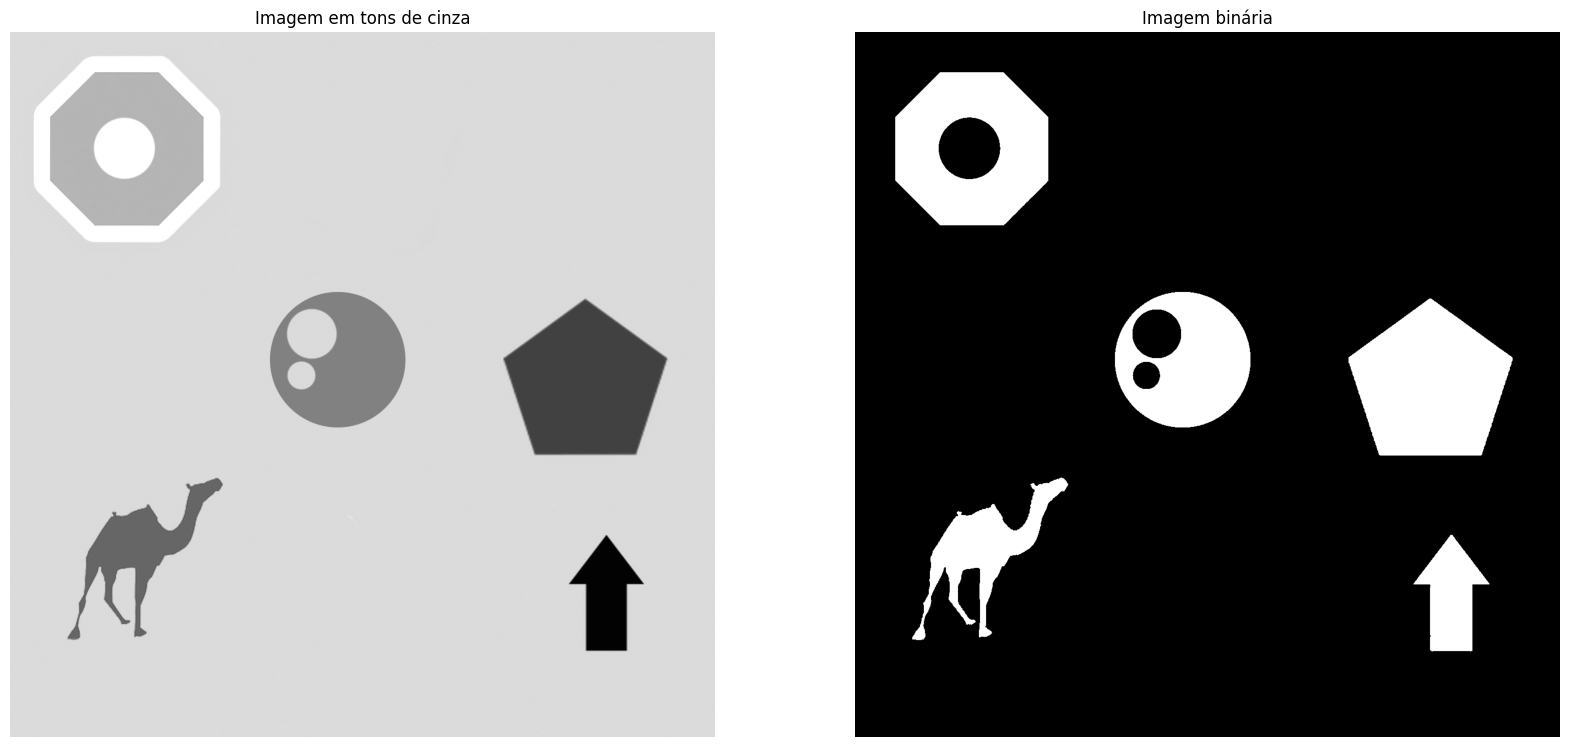

In [ ]:
# Display.
plt.figure(figsize = (20, 10))
plt.subplot(121); plt.axis('off'); plt.imshow(imageGray); plt.title('Imagem em tons de cinza')
plt.subplot(122); plt.axis('off'); plt.imshow(thresh); plt.title('Imagem binária');

## 4. Contour Finding
There are many algorithms for finding Contours. Here, We will use the OpenCV function [**`findContours`**](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) to get the boundaries of the objects.

### <font style="color:rgb(8,133,37)">Function Syntax </font>

```python
contours, hierarchy	=	cv.findContours(image, mode, method[, contours[, hierarchy[, offset]]])
```

Where,


- **`image`**	- input image (8-bit single-channel). Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary . You can use compare, inRange, threshold , adaptiveThreshold, Canny, and others to create a binary image out of a grayscale or color one.
- **`contours`** - Detected contours. Each contour is stored as a vector of points.
- **`hierarchy`** - Optional output vector containing information about the image topology.
- **`mode`** - Contour retrieval mode, ( RETR_EXTERNAL, RETR_LIST, RETR_CCOMP, RETR_TREE )
- **`method`** - [Contour approximation method](https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff). ( CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE, CHAIN_APPROX_TC89_L1 etc )
- **`offset`** - Optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI and then they should be analyzed in the whole image context.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`drawContours()`**](https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc)

In [ ]:
# Find all contours in the image.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Number of contours.
print("Number of contours found = {}".format(len(contours)))

# Hierarchy.
print("\nHierarchy : \n{}".format(hierarchy))

Number of contours found = 8

Hierarchy : 
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [-1  6 -1 -1]]]


# 5.1 Drawing Contours


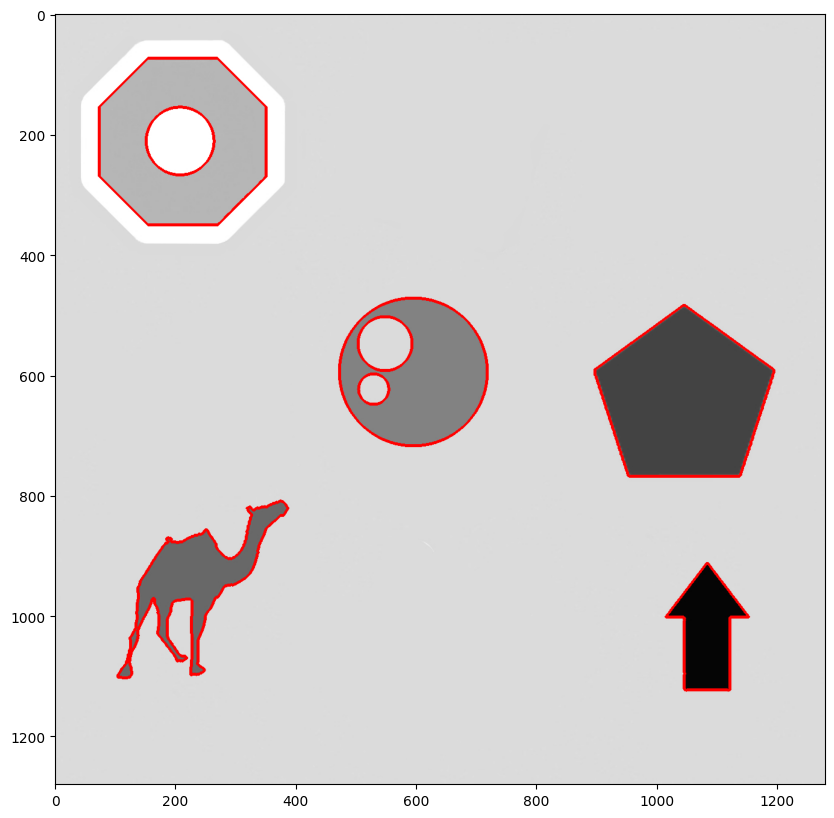

In [ ]:
# Create a copy of the original image.
imageCopy1 = image.copy()
# Draw all the contours.
cv2.drawContours(imageCopy1, contours, -1, (0,0,255), 3)
plt.imshow(imageCopy1[:,:,::-1]);

Here we can see that both the inner and outer contours have been detected. What if we only want to detect the outer contours? In that case, we can use `cv2.RETR_EXTERNAL` mode while calling `cv2.findContours` function. To acquire number of contours, we simply find the length of the array.

Number of contours found = 5


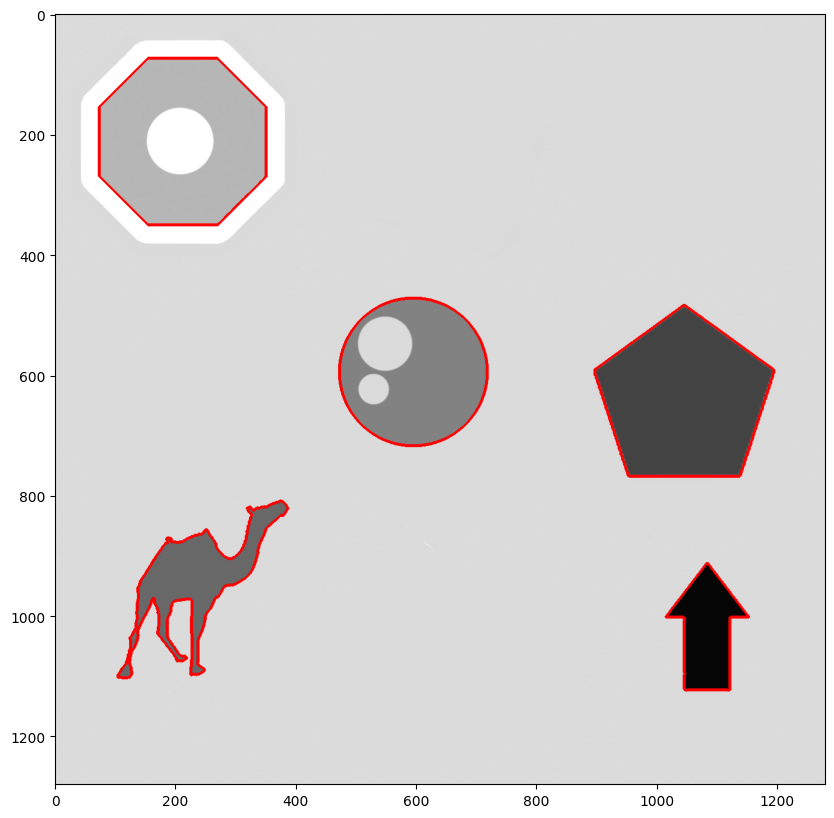

In [ ]:
# Find external contours in the image.
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("Number of contours found = {}".format(len(contours)))

# Create a copy of the original image.
imageCopy2 = image.copy()

# Draw all the contours.
cv2.drawContours(imageCopy2, contours, -1, (0,0,255), 4)

# Display.
plt.imshow(imageCopy2[:,:,::-1]);

## 5.2 Draw nth contour
Let's see how to draw only the 4th contour. Note that right now we do not know the numbering of contour in terms of the shapes present in the figure.

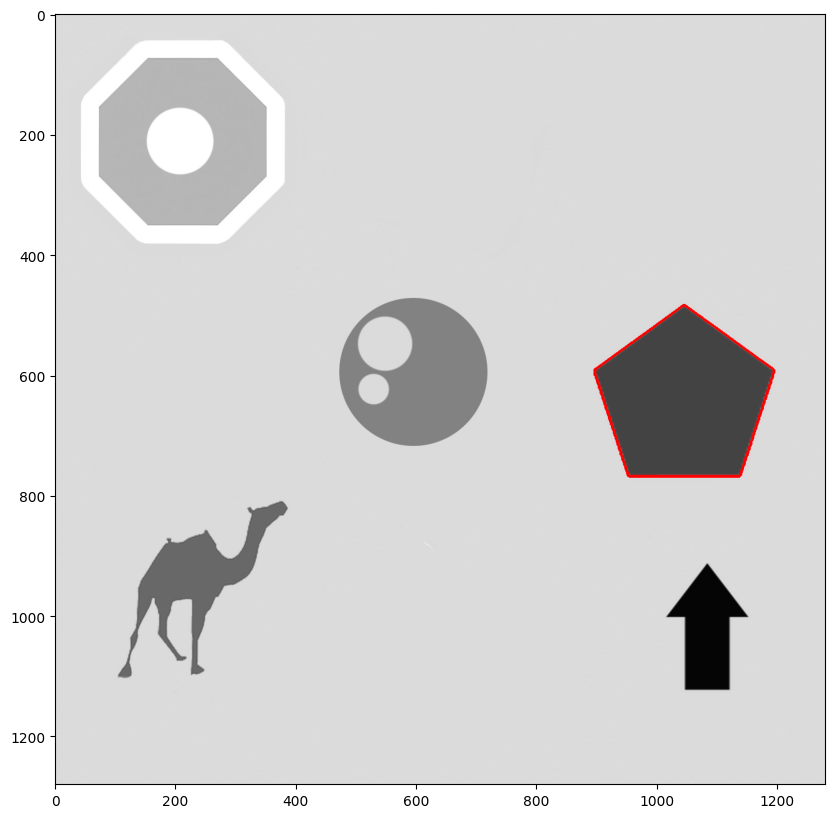

In [ ]:
# Create a copy of the original image.
imageCopy3 = image.copy()
# Draw contours.
cv2.drawContours(imageCopy3, contours[2], -1, (0,0,255), 4)
# Display.
plt.imshow(imageCopy3[:,:,::-1]);

## 5.3 Draw each contour in separate colors
Sometimes it is nice to quickly visualise if there are overlapping contours. One way to find this is by drawing each contour in its own color.

In [ ]:
def convert_color(hsv):
    """Utility to convert a single hsv color tuple into bgr"""
    pixel_img = np.uint8([[hsv]])
    return tuple(int(i) for i in cv2.cvtColor(pixel_img, cv2.COLOR_HSV2BGR).flatten())

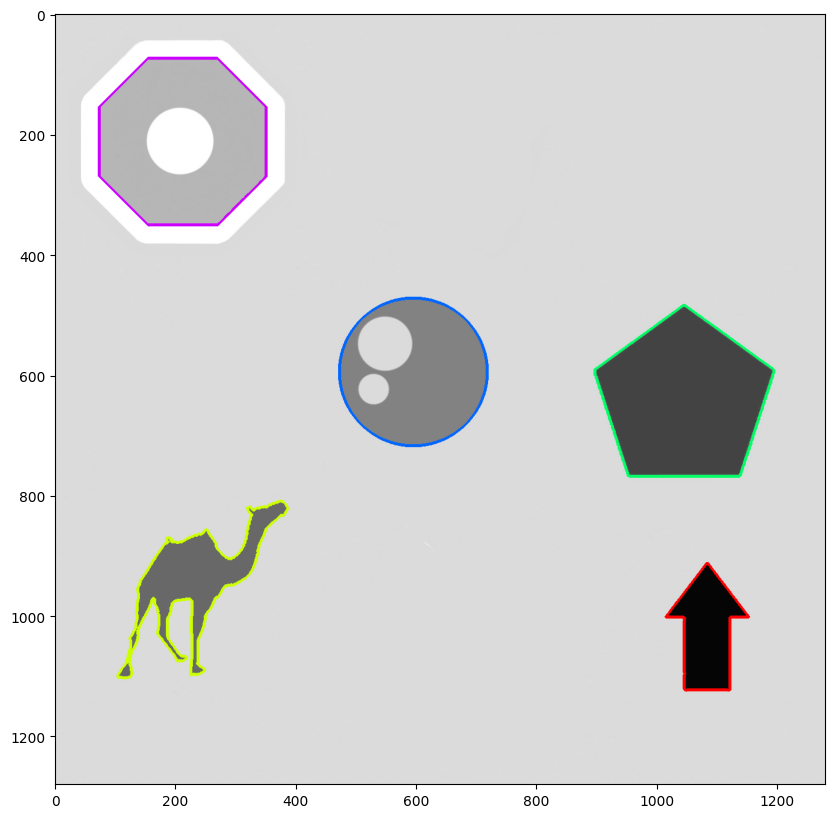

In [ ]:
imageCopy4 = image.copy()

for i, single_contour in enumerate(contours):
    hsv = (int(i/len(contours) * 180), 255, 255)
    color = convert_color(hsv)
    cv2.drawContours(imageCopy4, contours, i, color, 3)
    plt.imshow(imageCopy4[:,:,::-1]);

## 6. Contour Properties
Once we detect the contours from an image, it becomes very easy to do further analysis on the basis of various properties of contours. Let us discuss a few useful properties of contours.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`moments()`**](https://docs.opencv.org/4.5.2/d8/d23/classcv_1_1Moments.html)

[**`contourArea()`**](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#ga2c759ed9f497d4a618048a2f56dc97f1)

[**`boundingRect()`**](https://docs.opencv.org/4.5.2/db/dd6/classcv_1_1RotatedRect.html#a055a5d35e50bce65e3b1dee318dd3044)

[**`minEnclosingCircle()`**](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#ga8ce13c24081bbc7151e9326f412190f1)

[**`fitEllipse()`**](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gaf259efaad93098103d6c27b9e4900ffa)

[**`minAreaRect`**](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#ga3d476a3417130ae5154aea421ca7ead9)


### <font style="color:rgb(50,120,229)"> 6.1 Center of Mass or Centroid</font>
Let us find the center of mass for each contour.

In [ ]:
# Find all contours in the image.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image.
imageCopy5 = image.copy()

# Draw all the contours.
cv2.drawContours(imageCopy5, contours, -1, (0,0,255), 3)

array([[[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       ...,

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]],

       [[219, 219, 219],
        [219, 219, 219],
        [219, 219, 219],
        ...,
        [219, 219, 219],
        [219, 219, 219],
        [219, 219, 219]]

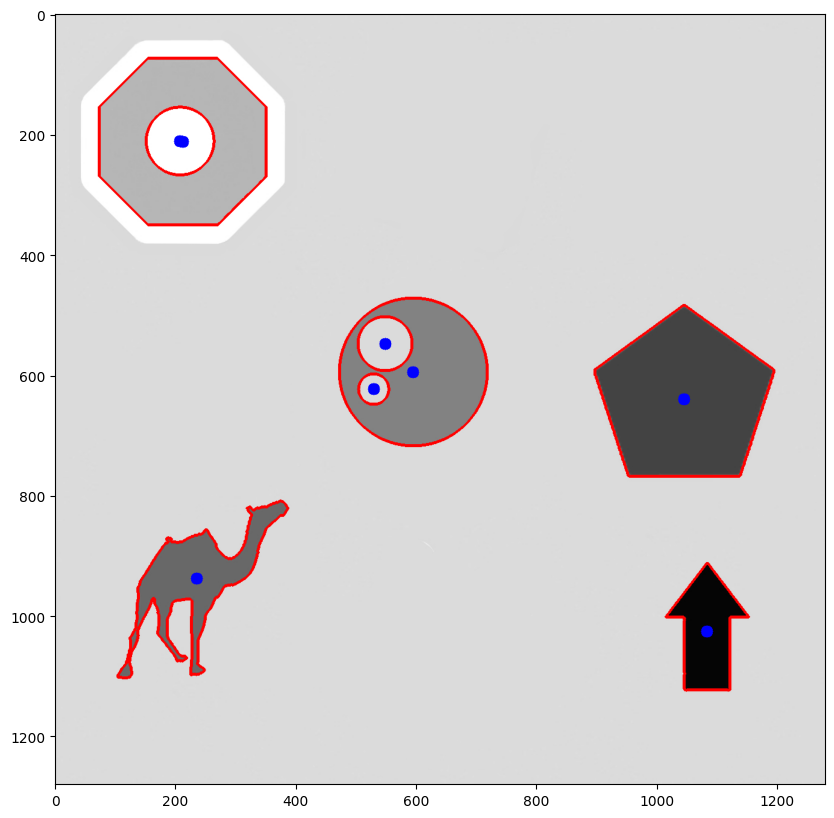

In [ ]:
for cnt in contours:
    # We will use the contour moments
    # to find the centroid.
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))

    # Mark the center.
    cv2.circle(imageCopy5, (x,y), 10, (255,0,0), -1)

# Display.
plt.imshow(imageCopy5[:,:,::-1]);

For the octagone shape, you can see that two points were marked very close, almost overlapping. That is because there are two contours having centroid close to each other.

### <font style="color:rgb(50,120,229)">6.2 Area and Perimeter</font>

In [ ]:
for index,cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print("Contour #{} has area = {} and perimeter = {}".format(index+1,area,perimeter))

Contour #1 has area = 15451.0 and perimeter = 619.6467478275299
Contour #2 has area = 22834.0 and perimeter = 1597.5920510292053
Contour #3 has area = 1989.0 and perimeter = 166.8528118133545
Contour #4 has area = 6305.0 and perimeter = 295.07820892333984
Contour #5 has area = 59085.0 and perimeter = 971.0336074829102
Contour #6 has area = 47425.0 and perimeter = 813.6366424560547
Contour #7 has area = 9952.0 and perimeter = 373.50461435317993
Contour #8 has area = 63666.5 and perimeter = 926.9919943809509


### <font style="color:rgb(50,120,229)">6.3 Bounding Boxes</font>

There are 2 type of bounding boxes we can create around a contour:

1. A vertical rectangle
2. A rotated rectangle - This is the bounding box with the minimum area

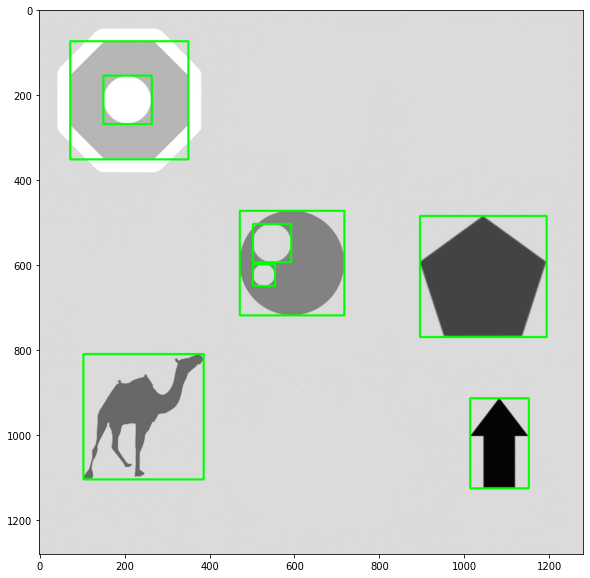

In [ ]:
# Create a copy of the original image.
imageCopy6 = image.copy()
for cnt in contours:
    # Vertical rectangle.
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(imageCopy6, (x,y), (x+w,y+h), (0,255,0), 4)
# Display.
plt.imshow(imageCopy6[:,:,::-1]);

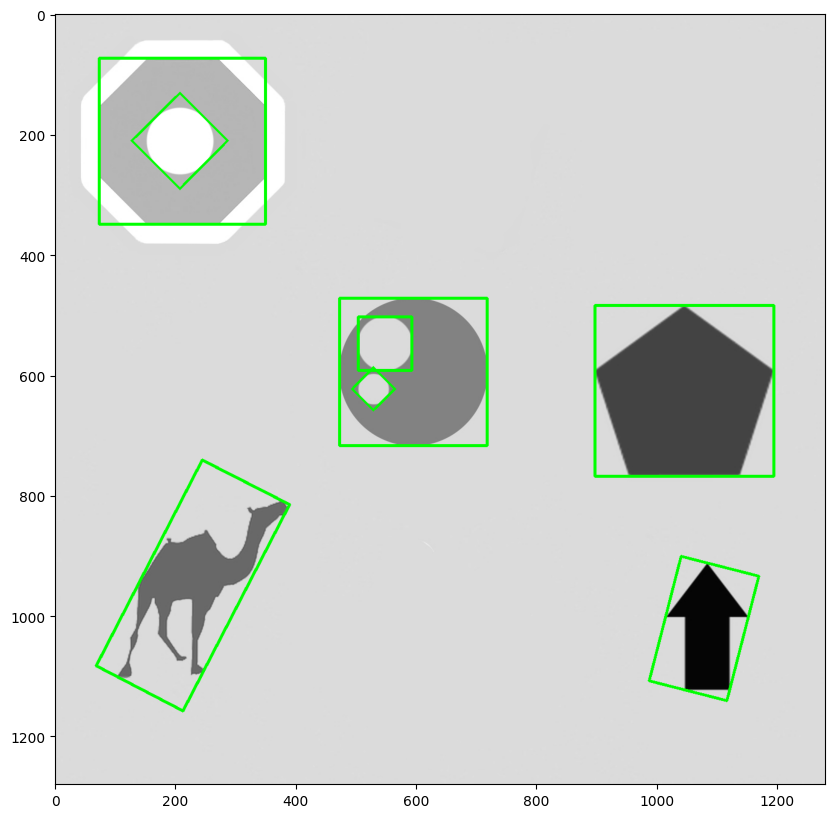

In [ ]:
# Create a copy of the original image.
imageCopy7 = image.copy()
for cnt in contours:
    # Rotated bounding box
    box = cv2.minAreaRect(cnt)
    boxPts = np.int64(cv2.boxPoints(box))
    # Draw contours.
    cv2.drawContours(imageCopy7, [boxPts], -1, (0,255,0), 4)
plt.imshow(imageCopy7[:,:,::-1]);

### <font style="color:rgb(50,120,229)">6.4 Fit a circle and ellipse</font>
Circle fitting can be compared with vertical bounding box fitting. It works best with images with square aspect ratio.

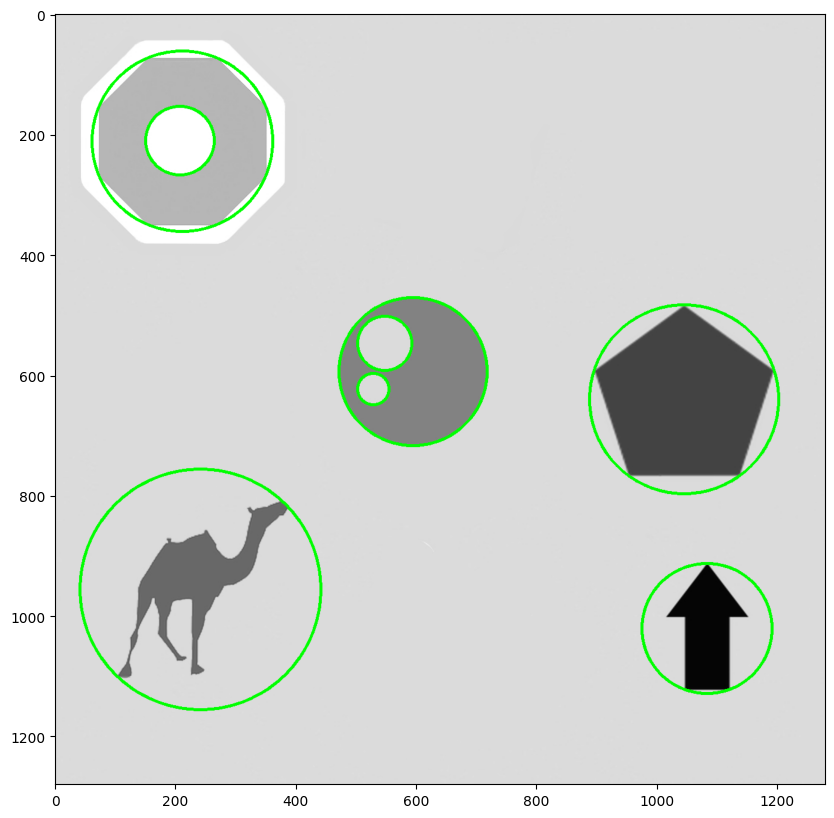

In [ ]:
# Create a copy of the original image.
imageCopy8 = image.copy()
for cnt in contours:
    # Circle fitting.
    ((x,y),radius) = cv2.minEnclosingCircle(cnt)
    cv2.circle(imageCopy8, (int(x),int(y)), int(round(radius)), (0,255,0), 4)
plt.imshow(imageCopy8[:,:,::-1]);

On the other hand, ellipse fitting can be compared with rotated bounding box that covers leaves minimum extra area. Note that we can fit an ellipse only when the contour has atleast 5 points.

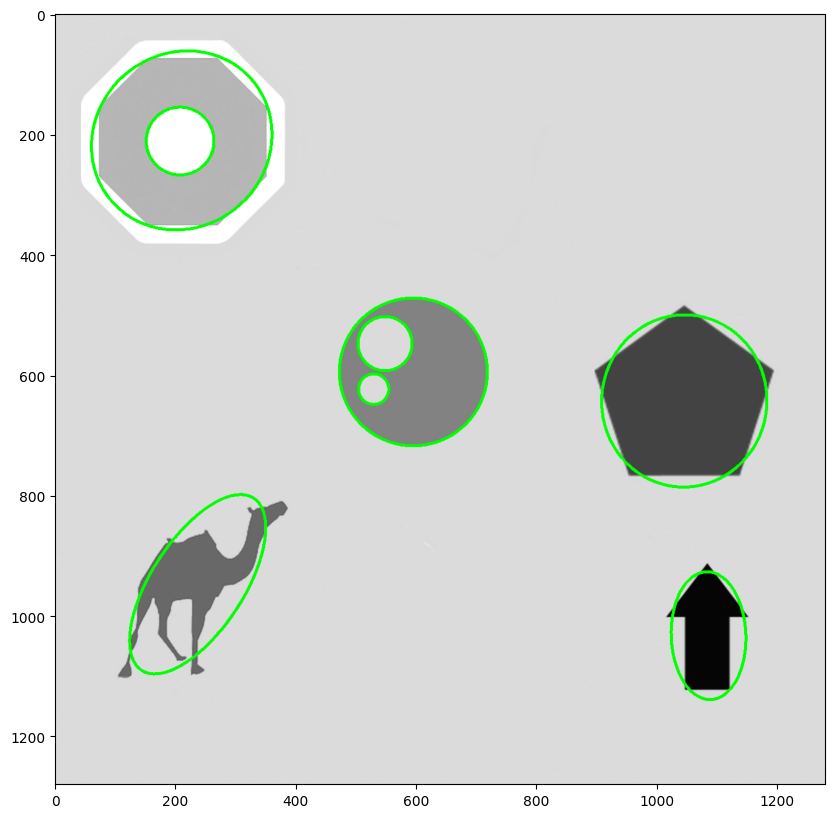

In [ ]:
# Create a copy of the original image.
imageCopy9 = image.copy()
for cnt in contours:
    if len(cnt) < 5:
        continue
    # Ellipse fitting.
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(imageCopy9, ellipse, (0,255,0), 4)
plt.imshow(imageCopy9[:,:,::-1]);

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/287dmicr7k30m3q/AADpOe7w4ouuMp2cyA1uNFjva?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

module-code.zip     100%[===================>]  30.59M  20.2MB/s    in 1.5s    
mapname:  conversion of  failed


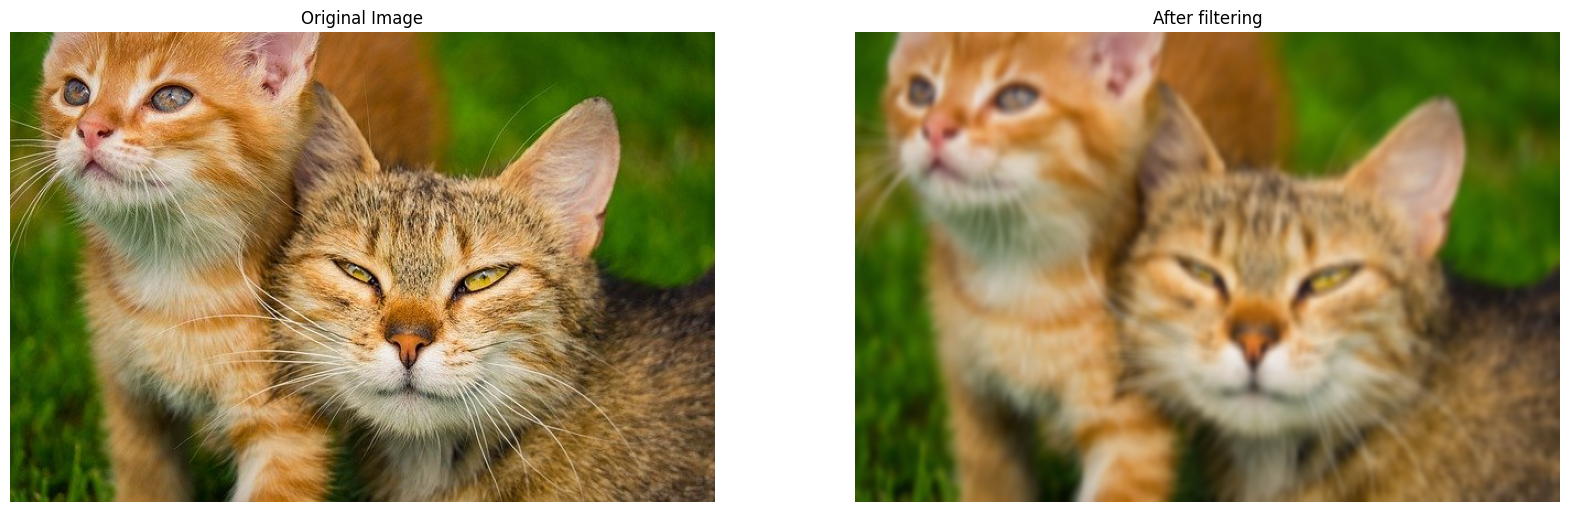

In [ ]:
filename = 'kitten.jpg'
image = cv2.imread(filename)

dst = cv2.GaussianBlur(image,(11,11),0,0,cv2.BORDER_DEFAULT)

plt.figure(figsize = [20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(image[:,:,::-1]); plt.title("Original Image")
plt.subplot(122); plt.axis('off'); plt.imshow(dst[:,:,::-1]);   plt.title("After filtering");

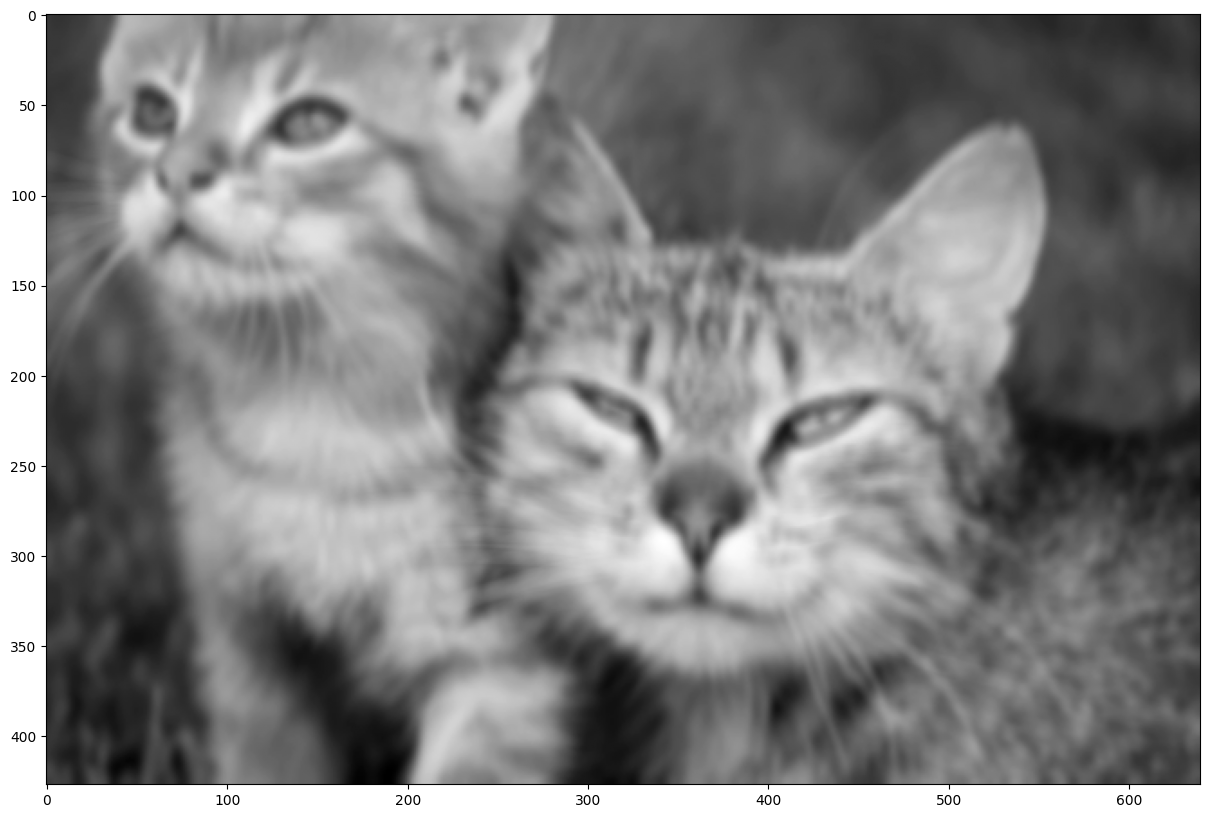

In [ ]:
# Convert the image to grayscale
gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY);
plt.imshow(gray)

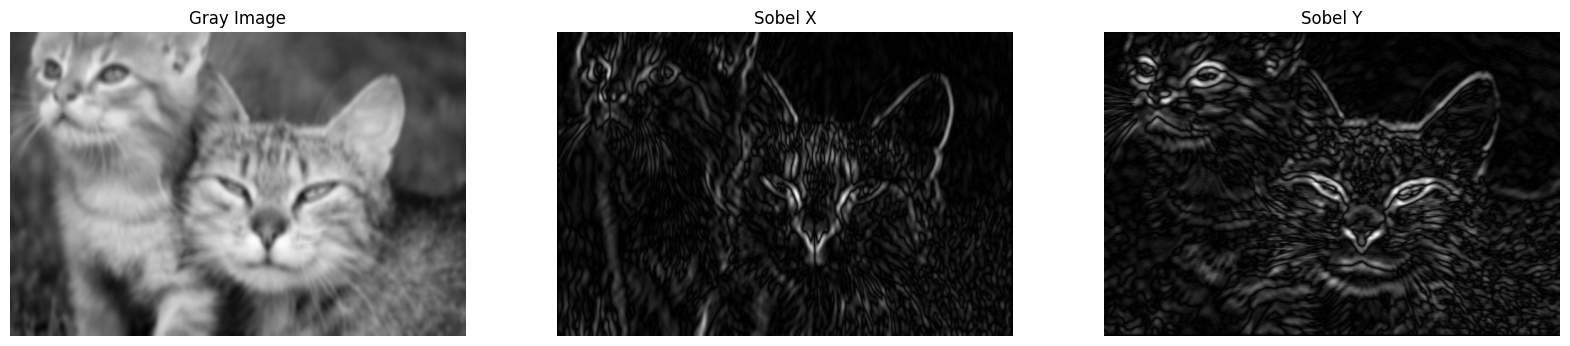

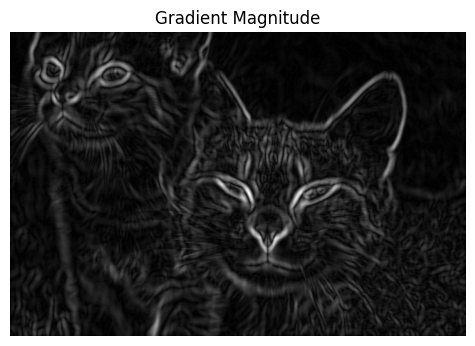

In [ ]:
# Aplicar o operador de Sobel
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

# Converter para escala absoluta
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

# Combinar os gradientes
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# Exibir resultados
plt.figure(figsize=[20,10])
plt.subplot(131); plt.axis('off'); plt.imshow(gray, cmap='gray'); plt.title("Gray Image")
plt.subplot(132); plt.axis('off'); plt.imshow(abs_grad_x, cmap='gray'); plt.title("Sobel X")
plt.subplot(133); plt.axis('off'); plt.imshow(abs_grad_y, cmap='gray'); plt.title("Sobel Y")
plt.figure(figsize=[20,10])
plt.subplot(133); plt.axis('off'); plt.imshow(grad, cmap='gray'); plt.title("Gradient Magnitude")
plt.show()

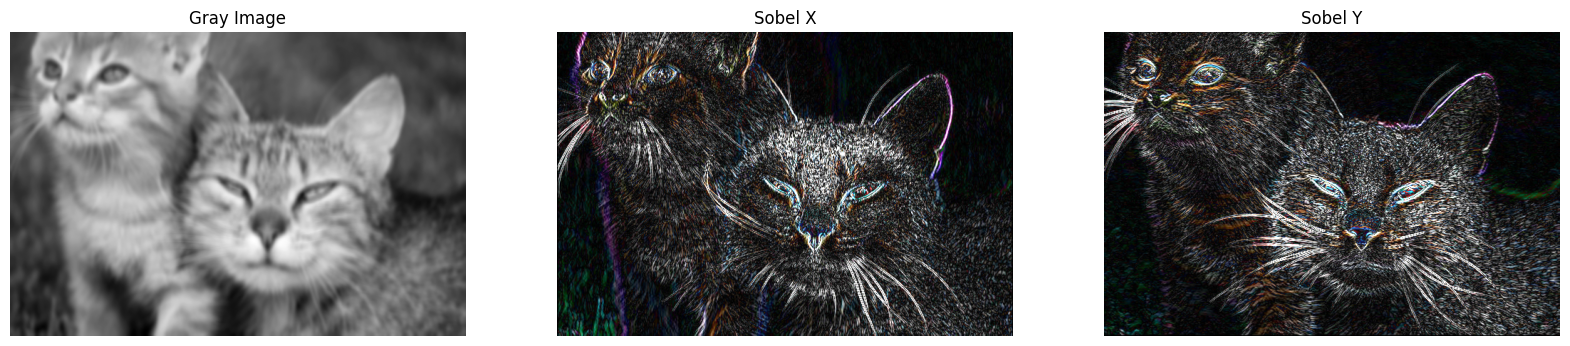

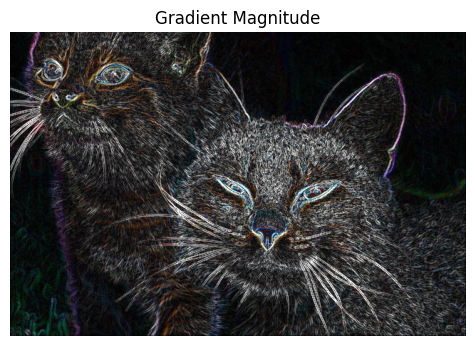

In [ ]:
# Aplicar o operador de Sobel
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image, ddepth, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image, ddepth, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

# Converter para escala absoluta
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

# Combinar os gradientes
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# Exibir resultados
plt.figure(figsize=[20,10])
plt.subplot(131); plt.axis('off'); plt.imshow(gray, cmap='gray'); plt.title("Gray Image")
plt.subplot(132); plt.axis('off'); plt.imshow(abs_grad_x, cmap='gray'); plt.title("Sobel X")
plt.subplot(133); plt.axis('off'); plt.imshow(abs_grad_y, cmap='gray'); plt.title("Sobel Y")
plt.figure(figsize=[20,10])
plt.subplot(133); plt.axis('off'); plt.imshow(grad, cmap='gray'); plt.title("Gradient Magnitude")
plt.show()

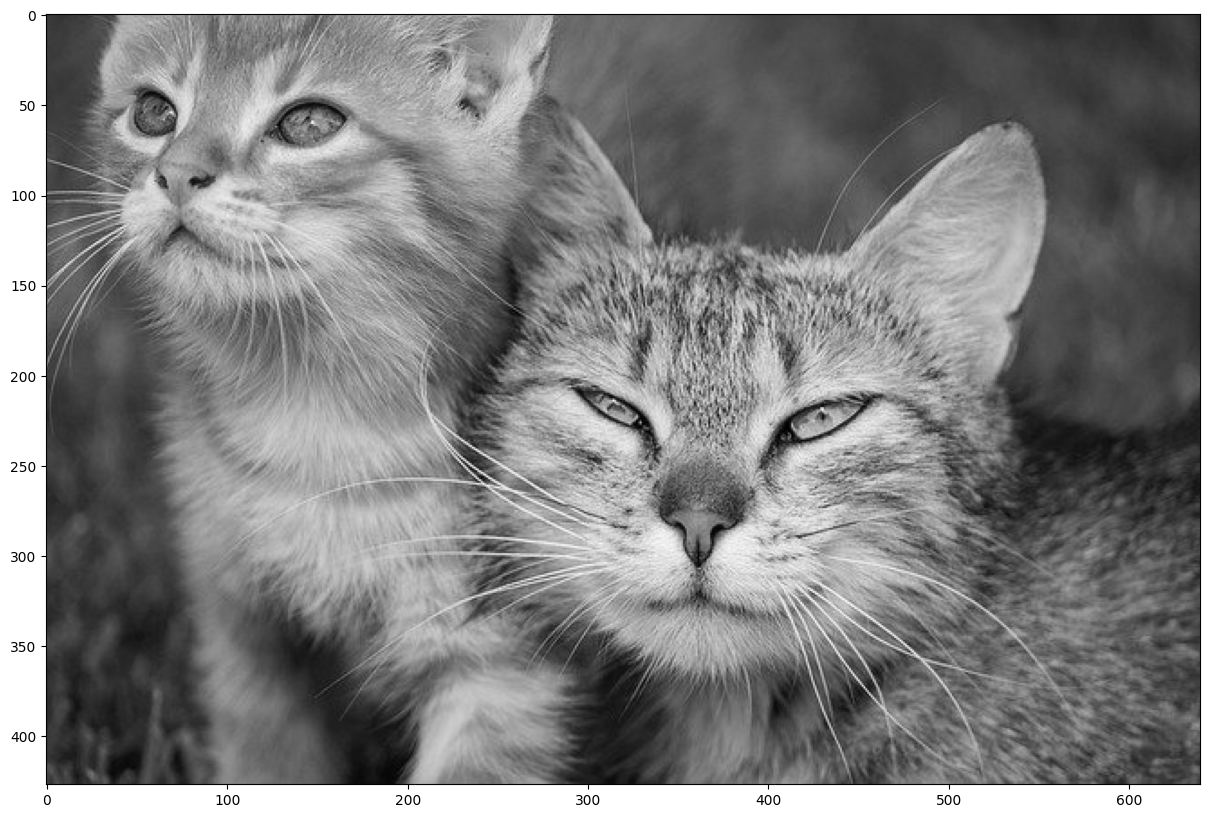

In [ ]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY);
plt.imshow(gray)

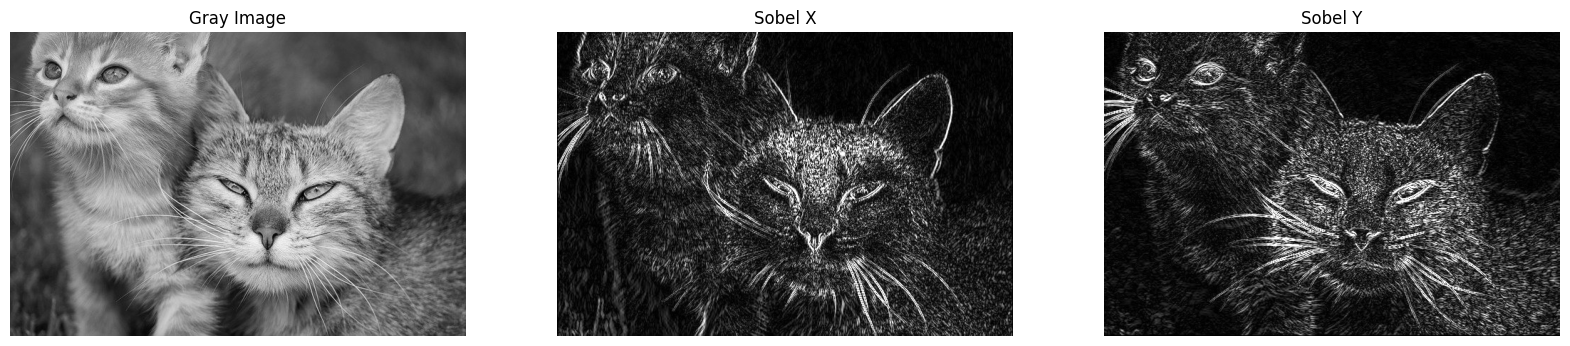

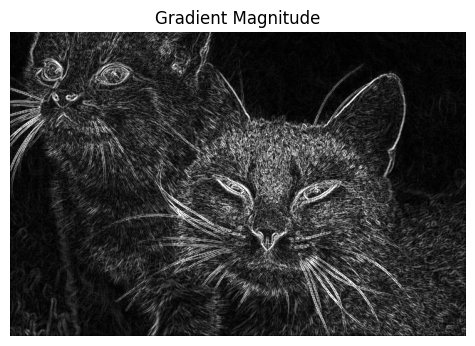

In [ ]:
# Aplicar o operador de Sobel
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=1, delta=0, borderType=cv2.BORDER_DEFAULT)

# Converter para escala absoluta
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

# Combinar os gradientes
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# Exibir resultados
plt.figure(figsize=[20,10])
plt.subplot(131); plt.axis('off'); plt.imshow(gray, cmap='gray'); plt.title("Gray Image")
plt.subplot(132); plt.axis('off'); plt.imshow(abs_grad_x, cmap='gray'); plt.title("Sobel X")
plt.subplot(133); plt.axis('off'); plt.imshow(abs_grad_y, cmap='gray'); plt.title("Sobel Y")
plt.figure(figsize=[20,10])
plt.subplot(133); plt.axis('off'); plt.imshow(grad, cmap='gray'); plt.title("Gradient Magnitude")
plt.show()

1. Quais seriam os melhores parâmetros para detectar bordas nas últimas figuras do Colab?
Para otimizar a detecção de bordas com o operador de Sobel, é importante ajustar alguns parâmetros:

- Profundidade do resultado (`ddepth`): Normalmente utiliza-se `cv2.CV_16S` para evitar saturação dos valores negativos.
- Tamanho do kernel (`ksize`): Um kernel 3x3 é o mais comum, mas pode-se testar 5x5 para suavizar mais, dependendo do ruído e dos detalhes desejados.
- Parâmetros `scale` e `delta`: Permitem ajustar a intensidade do gradiente e compensar possíveis deslocamentos.

Além disso, aplicar um filtro de suavização como o GaussianBlur antes do Sobel ajuda a reduzir ruídos e melhorar a detecção das bordas reais. No exemplo atual, está sendo utilizado um kernel de 11x11 no GaussianBlur, mas esse valor pode (e deve) ser ajustado conforme as características da imagem e o nível de suavização desejado.

2. Deve-se escolher entre uma etapa de pré-processamento mais adequada (GaussianBlur)?
Sim, a aplicação de um filtro de suavização, como o GaussianBlur, é altamente recomendada antes de aplicar o Sobel. Isso reduz o ruído na imagem, evitando que pequenas variações sejam interpretadas como bordas, tornando o resultado mais limpo e preciso.

3. Qual o tamanho do Kernel do filtro de suavização que mais contribui para a detecção de borda?
O tamanho do kernel no GaussianBlur determina o grau de suavização. Um kernel 3x3 ou 5x5 geralmente é suficiente para reduzir o ruído sem perder detalhes importantes. Kernels maiores, como o 11x11 utilizado no exemplo, promovem uma suavização mais intensa, o que pode ser útil em imagens muito ruidosas, mas também pode eliminar bordas relevantes. Recomenda-se começar com 3x3 e ajustar conforme necessário para cada imagem.

4. Por que suavizar a imagem melhora a detecção de bordas?
A suavização da imagem, especialmente com o filtro Gaussiano, reduz o ruído de alta frequência que pode causar falsas detecções de bordas. Isso permite que o operador de Sobel destaque melhor as transições reais de intensidade, resultando em uma detecção de bordas mais precisa e menos sujeita a ruídos.
